<a href="https://colab.research.google.com/github/Mohamedhegazzy52/Car-Price-Predictions-/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics
import matplotlib.pyplot as plt

Data Uploading

In [62]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)



Saving car data.csv to car data (2).csv


Information about the dataset


In [63]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [64]:
df.shape

(301, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Data Preprocessing

In [ ]:
# Check missing values
df.isnull().sum()

In [18]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [65]:
# data Encoding
df_encoded = pd.get_dummies(df,columns= ['Fuel_Type','Seller_Type','Transmission'], drop_first=True)

In [66]:
df_encoded.head(5)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,False,True,False,True
1,sx4,2013,4.75,9.54,43000,0,True,False,False,True
2,ciaz,2017,7.25,9.85,6900,0,False,True,False,True
3,wagon r,2011,2.85,4.15,5200,0,False,True,False,True
4,swift,2014,4.60,6.87,42450,0,True,False,False,True


Splitting the data

In [67]:
X = df_encoded.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
Y = df['Selling_Price']

In [76]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

Model Training

  1. Linear Regression

In [77]:
Model1 = LinearRegression()

In [78]:
Model1.fit(X_train, Y_train)

LinearRegression()

In [80]:
# Predict on training data
train_predicted = Model1.predict(X_train)

In [81]:
# Predict on testing data
test_predicted = Model1.predict(X_test)

Model_Evaluation

In [82]:
# R_Squared Error For Training
Error_Score = metrics.r2_score(Y_train,train_predicted)
print('R2_score:', Error_Score)

R2_score: 0.8822783397439666


In [84]:
# R_Squared Error For Testing
Error_Score = metrics.r2_score(Y_test,test_predicted)
print('R2_score:', Error_Score)

R2_score: 0.8625260513315895


Result Visulization

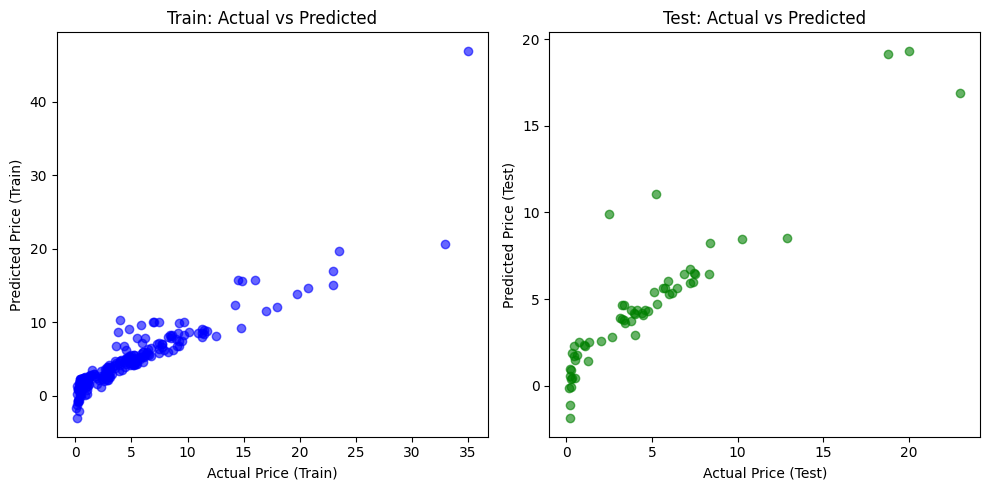

In [94]:


plt.figure(figsize=(10,5))
# Predictions on train
plt.subplot(1,2,1)  # Left plot
plt.scatter(Y_train, train_predicted, color="blue", alpha=0.6)
plt.xlabel("Actual Price (Train)")
plt.ylabel("Predicted Price (Train)")
plt.title("Train: Actual vs Predicted")

# Predictions on test
plt.subplot(1,2,2)  # Right plot
plt.scatter(Y_test, test_predicted, color="green", alpha=0.6)
plt.xlabel("Actual Price (Test)")
plt.ylabel("Predicted Price (Test)")
plt.title("Test: Actual vs Predicted")

plt.tight_layout()
plt.show()


2. Lasso Regression Model

In [86]:
Model2 = Lasso()

In [87]:
Model2.fit(X_train, Y_train)

Lasso()

In [88]:
# Predicting on training Data
train_predicted = Model2.predict(X_train)

In [89]:
# Predicting on testing Data
test_predicted = Model2.predict(X_test)

In [90]:
# R2 Score for training
Error_Score = metrics.r2_score(Y_train, train_predicted)
print('R2_Score :', Error_Score)

R2_Score : 0.8416309679582044


In [91]:
# R2 Score for testing
Error_Score = metrics.r2_score(Y_test, test_predicted)
print('R2_Score :', Error_Score)

R2_Score : 0.8544755211923214


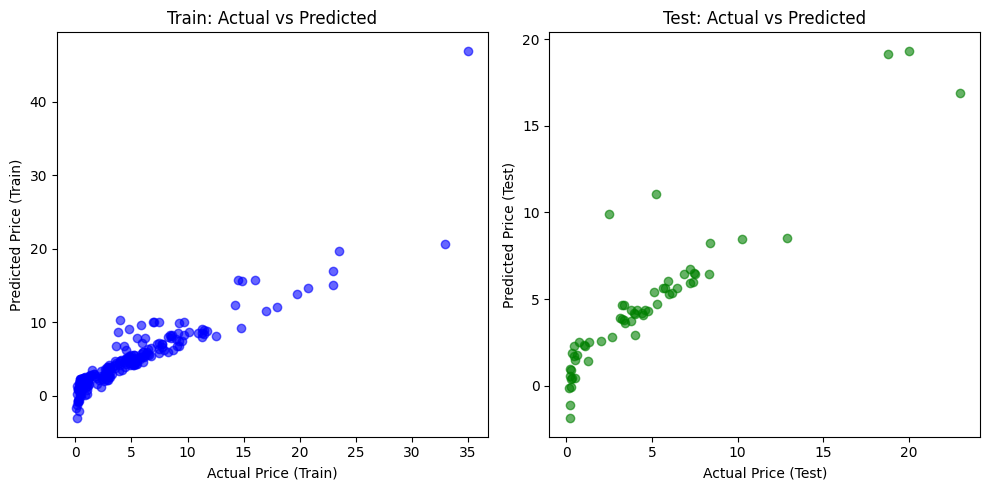

In [93]:


# Predictions on train
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(Y_train, train_predicted, color="blue", alpha=0.6)
plt.xlabel("Actual Price (Train)")
plt.ylabel("Predicted Price (Train)")
plt.title("Train: Actual vs Predicted")

# Predictions on test
plt.subplot(1,2,2)
plt.scatter(Y_test, test_predicted, color="green", alpha=0.6)
plt.xlabel("Actual Price (Test)")
plt.ylabel("Predicted Price (Test)")
plt.title("Test: Actual vs Predicted")

plt.tight_layout()
plt.show()
